<a href="https://colab.research.google.com/github/Srinadh9121/airbnb_booking_ED_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Introduction to Exploratory Data Analysis-EDA**


---


*   EDA is applied to investigate the data and summarize the key insights. 
*   It will give you the basic understanding of your data, it's distribution, null values and much more. 
*   You can either explore data using graphs or through some python functions.

**There will be two type of analysis:**

*   **Univariate and Bivariate**. In the univariate, we analyzing a single attribute. But in the bivariate, you will be analyzing an attribute with the target attribute.




# **Introduction to Airbnb**


---


Airbnb, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving **commission** from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, **AirBedandBreakfast.com**.

In [ ]:
# Importing Numpy and Pandas which are important in all over the analysis
import numpy as np
import pandas as pd

# Importing Date and time 
from datetime import datetime

# Importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lets extract the data from drive 
airbnb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb Booking Analysis - Lekkala Srinadh/Airbnb NYC 2019.csv')

# **Lets explore the Data**

In [ ]:
# View the data 
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Basic information about the data
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Lets describe the data
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Lets see the shape of the data
airbnb_data.shape

(48895, 16)

In [ ]:
# Lets see the columns of the data
list(airbnb_data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

# **From the above data, I observed that:**

*   There are 16 columns in data set.
*   All columns are not important in the analysis. So i focused on main columns which important such as neighbourhood_group, room_type, price, reviews, availability_365 and hosts.
*   I also observe that their are many null values in last_review and reviews_per_month columns and also we have some null values in another columns also.
*   So lets first handle those missing values by replacing with zeroes or removing the columns if it is not neccesary for the analysis.






# **Handling the missing values and cleaning the data**
This dataset contains null values. These null values maya cause error while executing any code or while plotting graphs. So, this null values must be checked before operating on data.

In [ ]:
# Finding total number of null values
airbnb_data.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Observation:**

**There are four columns with null values:**
*   'last_review' and 'reviews_per_month' columns are having 10052 values.
*   'host_name' column is having 21 null values.
*   'name' column is having 16 null values.

From data analysis point of view 'host_name' and 'name' columns are not used and it is not important also. So, we leave the null values like that and we change the remaining two columns.




In [ ]:
# Converting NaN values of reviews_per_month and last_review
airbnb_data['reviews_per_month'].fillna('0', inplace = True)
airbnb_data['last_review'].fillna('0', inplace = True)

In [ ]:
# Lets check the null values
airbnb_data.isnull().sum().sort_values(ascending=False)

host_name                         21
name                              16
id                                 0
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

# **Which are the top hosts in NYC according to neighbourhood and Airbnb listings?**

In [ ]:
# Lets check the top neighbourhood with most listings
host_areas = airbnb_data.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).rename(columns={'calculated_host_listings_count':'calculated_host_listings_count_max'}).head(10)

,host_id,host_name,neighbourhood_group,calculated_host_listings_count_max
34740,219517861,Sonder (NYC),Manhattan,327
29480,107434423,Blueground,Brooklyn,232
29481,107434423,Blueground,Manhattan,232
19626,30283594,Kara,Manhattan,121
31157,137358866,Kazuya,Brooklyn,103
31158,137358866,Kazuya,Manhattan,103
31159,137358866,Kazuya,Queens,103
12839,12243051,Sonder,Manhattan,96
14475,16098958,Jeremy & Laura,Manhattan,96
25730,61391963,Corporate Housing,Manhattan,91


From this above data we can see that most of thr hosts are from manhattan. so we can say that most of the traffic of hosts is from manhattan area. 

# **Now lets check which area got most of the properties**

Latitude and longitude are used to identify specific locations, which can also be useful in identifying landmarks. Latitude and longitude form a grid system that helps to identify the exact or absolute locations on the surface of the earth. A scatter plot map of the density of properties within neighbourhood regions can be made on that basis.

So,let's find the longitude and latitude with help of scatter plot.

In [ ]:
# let's see the latitude and longitude columns from the data set
airbnb_data[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


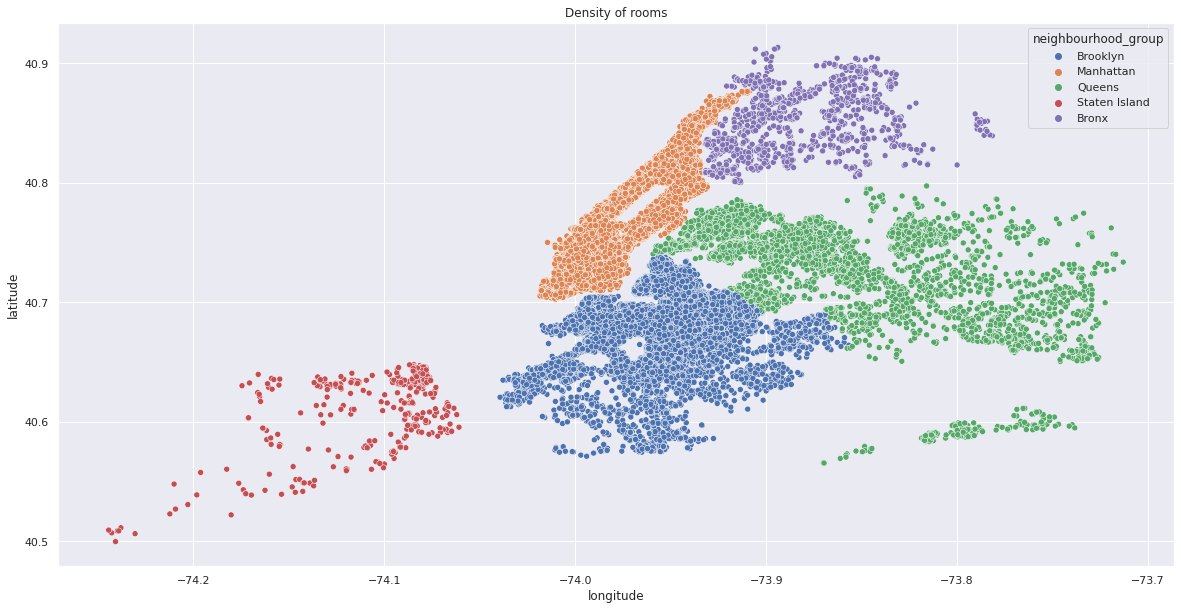

In [ ]:
# With the help of the scatter plot lets find the density of neighbourhood across the location
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
axis_5=sns.scatterplot(data=airbnb_data, y='latitude', x='longitude', hue='neighbourhood_group')
axis_5.set_title('Density of rooms')
axis_5.set_xlabel('longitude')
axis_5.set_ylabel('latitude')
plt.show()

The above scatter plot map shows that manhattan is the most preffered area and most of the investers are interested in manhattan followed by Brooklyn and Queens.
Staten island have least density of properties

# **Analysis on Room Type on basis of area**

There are different catagories of room types available for booking. Lets analyze the most and least tye of room in the dataset.

In [ ]:
# The data of room type within the neighbourhood groups
roomtype_within_neighbourhood = airbnb_data.groupby('neighbourhood_group')['room_type'].value_counts()
roomtype_within_neighbourhood.head(20)

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

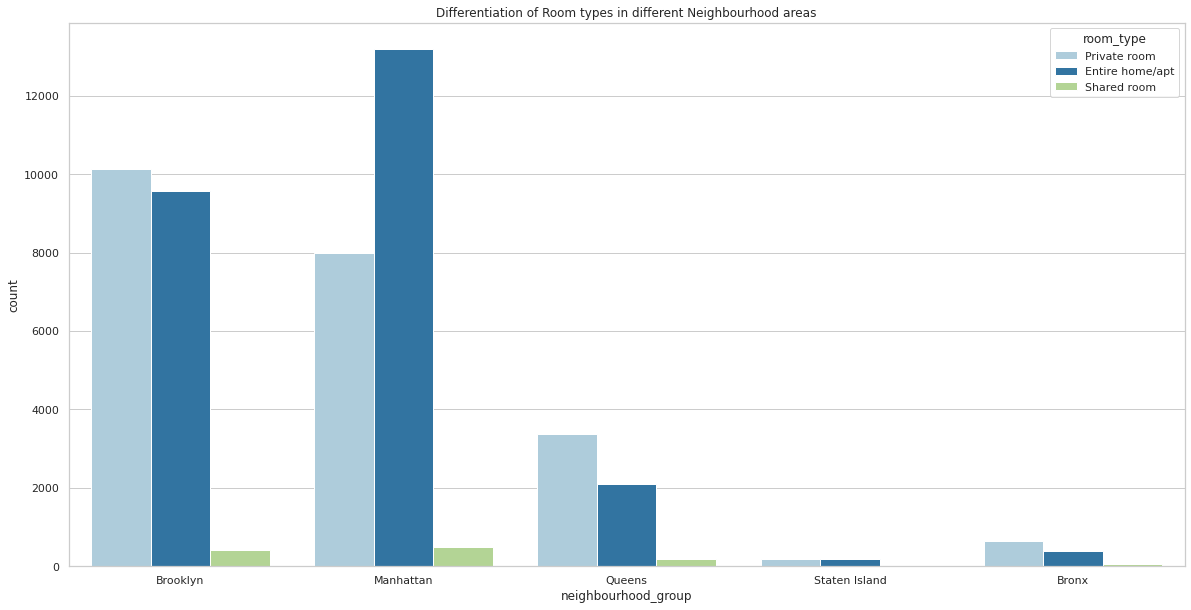

In [ ]:
# Lets plot the above data with the help of countplot
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.countplot(data=airbnb_data, x='neighbourhood_group', hue='room_type',palette='Paired')
plt.title('Differentiation of Room types in different Neighbourhood areas')
plt.show() 

The countplot shows that most of the customers are intrested in booking Entire home/apt in the neighbourhood group manhattan but private rooms are intrested in the neighbourhood group brooklyn.

# **What can we learn from price predictions**

Lets see the prices of the each neighbourhood with the help of the swarmplot

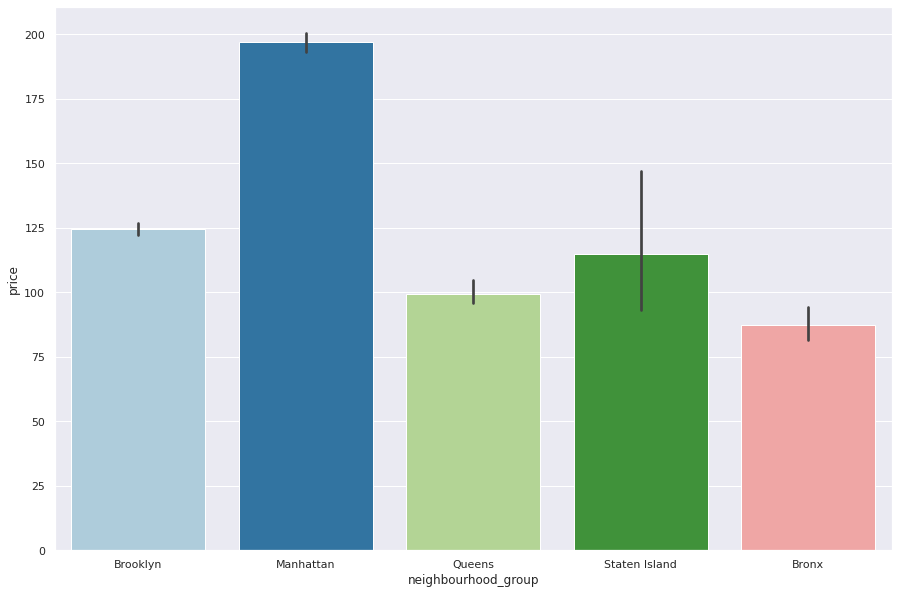

In [ ]:
# prices of each neighbourhood groups
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(data=airbnb_data, x='neighbourhood_group', y='price', palette='Paired')
plt.show()


*   The above bar table shows that manhattan is very expensive comparing to brooklyn and staten island. And the bronx is haveing less prices. 
*   Lets distribute the price in categories as High price, affordable price and low price and check over categories for all the properties. 

**Here we consider the prices less than or equal to 90 as low prices and more than 90 but less 300 as affordable prices and more than 300 as high prices.**




In [ ]:
airbnb_data['price_category'] = airbnb_data.apply((lambda x: 'Low price' if x['price']<=90 else 'Affordable price' if x['price']>90 and x['price']<=300 else 'High price' ),axis=1)
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Affordable price
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Affordable price
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365,Affordable price
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low price
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0,Low price


In [ ]:
# Lets check unique price category counts
Price_category_counts = airbnb_data.price_category.value_counts().reset_index()
Price_category_counts

,index,price_category
0,Affordable price,25640
1,Low price,19898
2,High price,3357


**Let's create piechart for more clarity for the above data**

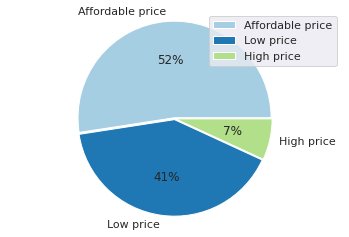

In [ ]:
# declaring exploding pie
explode = [0.01, 0.01, 0.01]

# labels of the data
label=Price_category_counts['index']

# defining seaborn color palette to use
palette_color = sns.color_palette('Paired')

# plotting data on chart
plt.pie(Price_category_counts['price_category'], labels=label, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.legend(label, loc='best')
plt.axis('equal')
plt.show()

The above piechart shows that most of the people are prefer to the Affordable price category and least people prefer to the high price category.

**Lets create the barplot by grouping the neighbourhood and price category columns.**

In [ ]:
# Grouping the neighbourhood and price category
price_category_neighbourhood= airbnb_data.groupby(['neighbourhood_group','price_category'])['id'].count().reset_index(name='counts')
price_category_neighbourhood

,neighbourhood_group,price_category,counts
0,Bronx,Affordable price,279
1,Bronx,High price,24
2,Bronx,Low price,788
3,Brooklyn,Affordable price,9256
4,Brooklyn,High price,766
5,Brooklyn,Low price,10082
6,Manhattan,Affordable price,14033
7,Manhattan,High price,2452
8,Manhattan,Low price,5176
9,Queens,Affordable price,1942


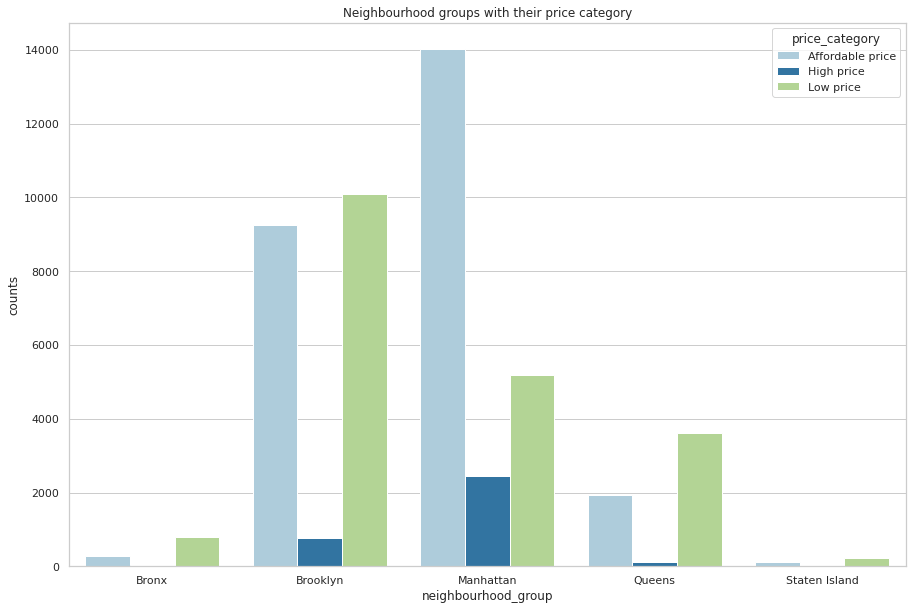

In [ ]:
# Plotting the above data
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.barplot(data=price_category_neighbourhood, x='neighbourhood_group', hue='price_category', y='counts', palette='Paired')
plt.title('Neighbourhood groups with their price category')
plt.show()

The above bar plot shows that the neighbourhood groups manhattan has more affordable prices and also high prices and brooklyn has more low prices comparing to all the neighbourhood groups. 

# **What can we learn from review predictions**

In [ ]:
# lets see tha total number of reviews
total_no_of_reviews = airbnb_data['number_of_reviews'].sum()
total_no_of_reviews

1138005

In [ ]:
reviews_within_neighbourhood = airbnb_data.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index(name='total_reviews')
reviews_within_neighbourhood

,neighbourhood_group,total_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


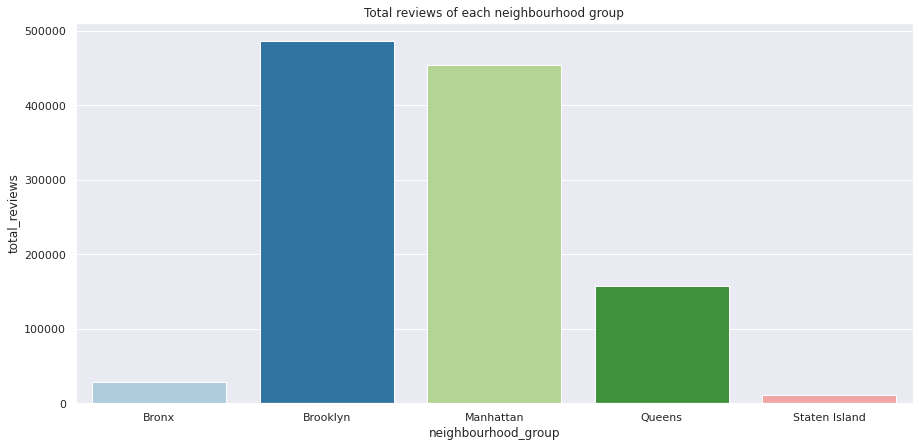

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.barplot(data=reviews_within_neighbourhood, x='neighbourhood_group', y='total_reviews',palette='Paired')
plt.title('Total reviews of each neighbourhood group')
plt.show() 


From the above data and visualization we can predict that most of the people who visiting the neighbourhood group brooklyn are giving the reviews.

#  **Which hosts are the busiest and why?**

In [ ]:
# Finding busiest hosts
busiest_hosts = airbnb_data.groupby(['host_name','neighbourhood_group'])['host_id'].value_counts().reset_index(name='counts')
busy_hosts=busiest_hosts.sort_values(by=['counts'], ascending=False).head(10)
busy_hosts

,host_name,neighbourhood_group,host_id,counts
33329,Sonder (NYC),Manhattan,219517861,327
4885,Blueground,Manhattan,107434423,230
19034,Kara,Manhattan,30283594,121
16605,Jeremy & Laura,Manhattan,16098958,96
33328,Sonder,Manhattan,12243051,96
7828,Corporate Housing,Manhattan,61391963,91
19836,Ken,Manhattan,22541573,86
19674,Kazuya,Queens,137358866,79
29245,Pranjal,Manhattan,200380610,65
25858,Mike,Manhattan,1475015,52


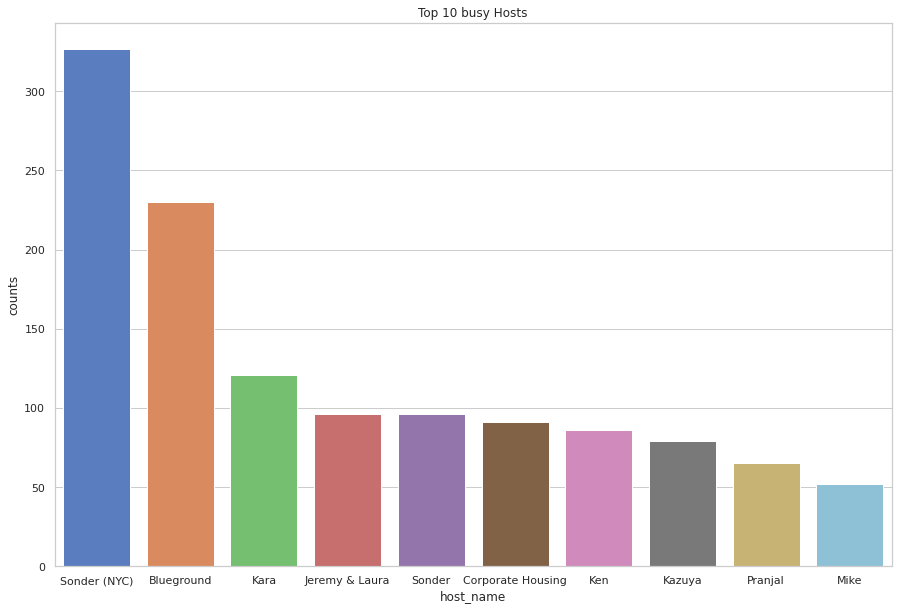

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.barplot(x="host_name", y="counts", data=busy_hosts, palette='muted')
plt.title('Top 10 busy Hosts')
plt.show()

We can see the top 10 busy hosts on the above plot that shows sondar(NYC) is the most busy host because these all hosts are from the neighbourhood group manhattan which have the most affordable prices and most visitings are intrested by the people.

#  **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
df=airbnb_data[airbnb_data.price<300]

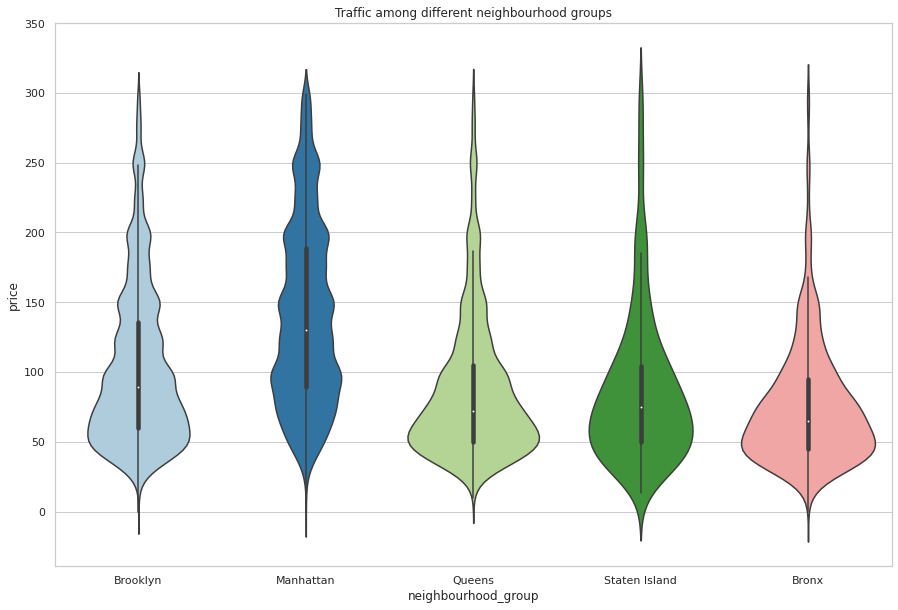

In [ ]:
# plotting traffic among different areas 
plt.figure(figsize=(15,10))
sns.violinplot(data=df, x='neighbourhood_group', y='price', palette='Paired')
plt.title('Traffic among different neighbourhood groups')
plt.show()